In [1]:
import StatsBase
include("./reservoir.jl");

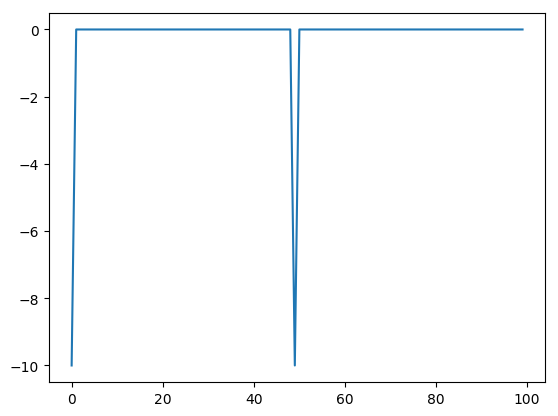

In [5]:
# define our energy function
energy = zeros(100)
energy[1] = -10
energy[50] = -10
xmean = sum((1:100) .* exp.(-energy)) / sum(exp.(-energy))
plot(energy);

In [80]:
@time begin
    wf = runwaterfall([Walker(scale * energy, 1) for scale in [1.0, 0.01, 0.0]], 250000, 10, 100, 50, 200, 4.0e99, false)
end

  1.201698 seconds (5.90 M allocations: 1.425 GiB, 10.88% gc time)


Waterfall with 3 walkers

In [81]:
wf.reservoirs[1].totalweight / wf.reservoirs[1].nsamples

441.78022518813833

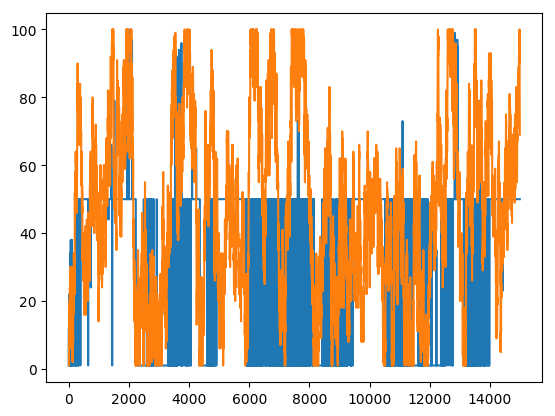

In [82]:
using PyPlot
xx = [1, 3]
for i in xx
    plot(wf.history[i, 1:15000])
end

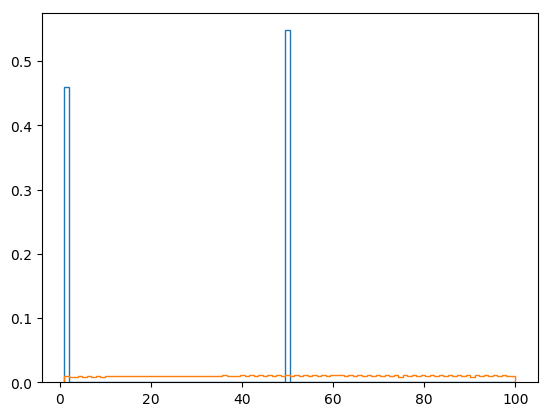

In [83]:
for i in xx
    plt[:hist](wf.history[i, :], bins=100, range=(1, 100), histtype="step", weights=wf.weighthistory[i, :], normed=true);
end

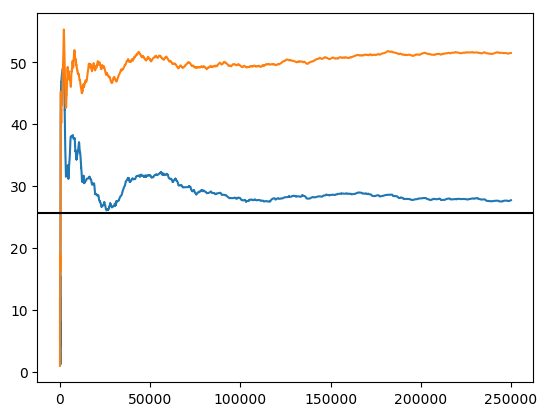

In [84]:
for i in xx
    plot(cumsum(wf.weighthistory[i, :] .* wf.history[i, :]) ./ cumsum(wf.weighthistory[i, :]));
end
axhline(xmean, color="black");

183.33154310098666


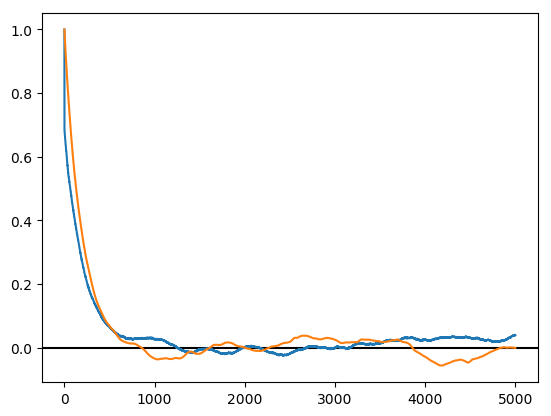

170.7612111520695


In [85]:
plt[:axhline](0, color="black")
for i in xx
    #acf = StatsBase.autocor(wf.history[i, :] - xmean, 0:5000, demean=false)
    acf = StatsBase.autocor(wf.weighthistory[i, :] .* wf.history[i, :], 0:5000, demean=true)
    plot(acf)
    println(sum(acf))
end

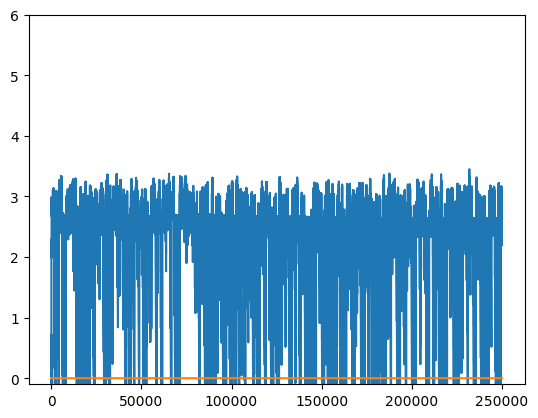

(-0.1, 6)

In [86]:
for i in xx
    plot(log10.(wf.weighthistory[i, :]));
end
plt[:ylim](-0.1, 6)

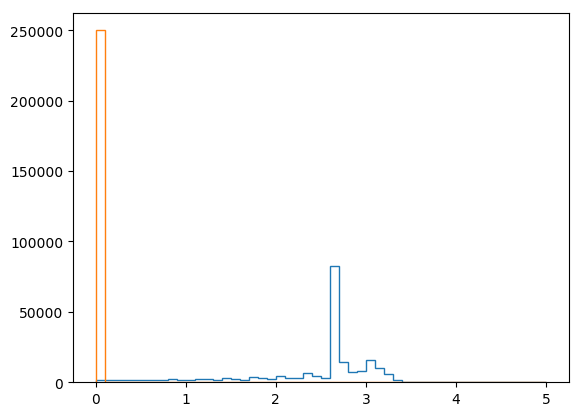

In [87]:
for i in xx
    plt[:hist](log10.(wf.weighthistory[i, :]), bins=50, range=(0, 5), histtype="step");
end

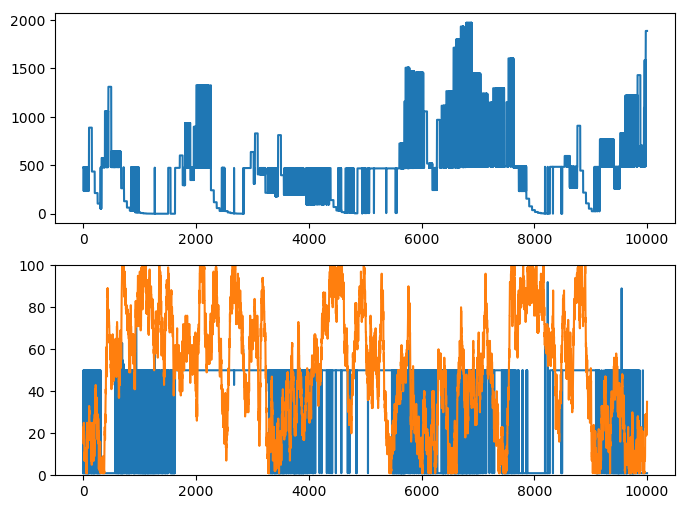

In [88]:
figure(figsize=(8, 6))
plt[:subplot](2, 1, 1)
plot(wf.weighthistory[1, 50_000:60_000])
plt[:subplot](2, 1, 2)
plot(wf.history[1, 50_000:60_000])
plot(wf.history[3, 50_000:60_000])
plt[:ylim](0, 100);

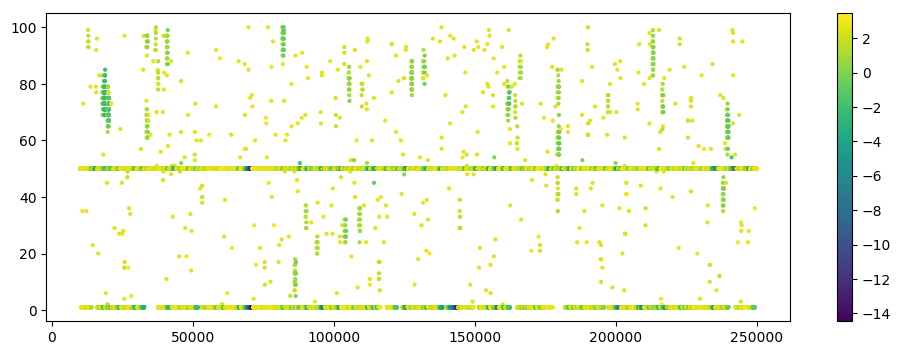

In [89]:
figure(figsize=(12, 4))
plt[:scatter](10000:250_000, wf.history[1, 10000:250_000], s=4,
c=log10.(wf.weighthistory[1, 10000:250_000]))
plt[:colorbar]();

In [66]:
for i in xx
    println(mean(wf.weighthistory[i, :]), "\t", std(wf.weighthistory[i, :]))
end

438.17743826018153	200.58996089790986
1.0	0.0


0.3665909454446258
0.5660419595162481
0.4947234190354988
0.5946844274942579
0.5946598574940833
0.7011244639684903
0.6214190872932602
0.49005039768626063
0.4001430899058985
0.

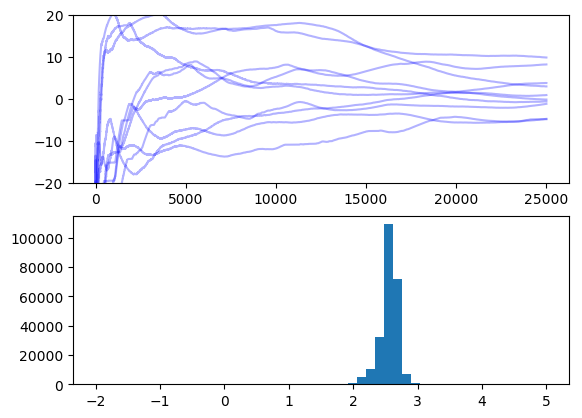

48946252662641593


In [263]:
rep = 1
N = 25000
NTRIAL = 10
mult1 = 1000
mult2 = 100
mult3 = 10
samplesteps = 10
usetoprep = false
x1 = []
x2 = []
x3 = []

for i=1:NTRIAL
    wf = runwaterfall([Walker(scale * energy, 1) for scale in logspace(0, -2, 5)], N, samplesteps,
                      2mult1, 1mult1, 3mult1, 4e99, usetoprep)
    plt[:subplot](2, 1, 1)
    plot(cumsum(wf.weighthistory[rep, :] .* wf.history[rep, :]) ./ cumsum(wf.weighthistory[rep, :]) - xmean,
         color="blue", alpha=0.3);    
        
    append!(x1, wf.weighthistory[rep, :])
    
    println(sum(wf.weighthistory[1, :]) / maximum(wf.weighthistory[1, :]) / size(wf.weighthistory[1, :], 1))
end
plt[:ylim](-20, 20)

plt[:subplot](2, 1, 2)
plt[:hist](log10.(x1), bins=50, range=(-2, 5));

0.38473369184506073
0.4395824648743648
0.42908791993708795
0.35647988998451724
0.4523674885520218
0.3796263162755296
0.35569047168580736
0.3791328137593791
0.3999997695580624
0.

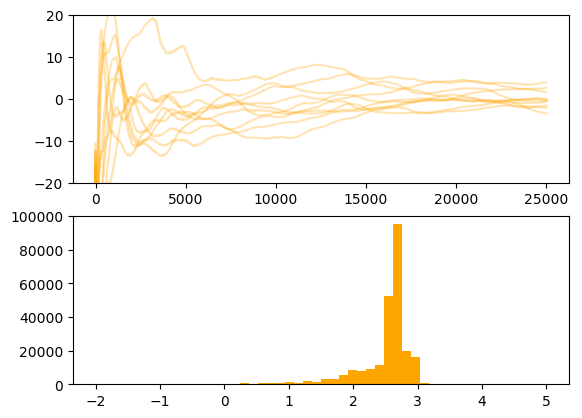

35585490284197857


In [264]:
for i=1:NTRIAL
    wf = runwaterfall([Walker(scale * energy, 1) for scale in logspace(0, -2, 5)], N, samplesteps,
                      2mult2, 1mult2, 3mult2, 4e99, usetoprep)
    plt[:subplot](2, 1, 1)
    plot(cumsum(wf.weighthistory[rep, :] .* wf.history[rep, :]) ./ cumsum(wf.weighthistory[rep, :]) - xmean,
         color="orange", alpha=0.3);    
        
    append!(x2, wf.weighthistory[rep, :])

    println(sum(wf.weighthistory[1, :]) / maximum(wf.weighthistory[1, :]) / size(wf.weighthistory[1, :], 1))
end
plt[:ylim](-20, 20)

plt[:subplot](2, 1, 2)
plt[:hist](log10.(x2), bins=50, range=(-2, 5), color="orange");

0.13256413926817437
0.1505359602315791
0.15931552632205842
0.14891394428339672
0.1314169238197636
0.1703879321790161
0.11170637857986951
0.12292660960444445
0.12832121334567595
0.

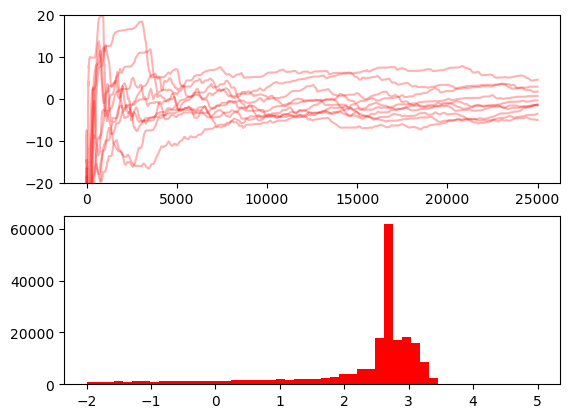

17268586974438171


In [265]:
for i=1:NTRIAL
    wf = runwaterfall([Walker(scale * energy, 1) for scale in logspace(0, -2, 5)], N, samplesteps,
                      2mult3, 1mult3, 3mult3, 4e99, usetoprep)
    plt[:subplot](2, 1, 1)
    plot(cumsum(wf.weighthistory[rep, :] .* wf.history[rep, :]) ./ cumsum(wf.weighthistory[rep, :]) - xmean,
         color="red", alpha=0.3);    
        
    append!(x3, wf.weighthistory[rep, :])

    println(sum(wf.weighthistory[1, :]) / maximum(wf.weighthistory[1, :]) / size(wf.weighthistory[1, :], 1))
end
plt[:ylim](-20, 20)

plt[:subplot](2, 1, 2)
plt[:hist](log10.(x3), bins=50, range=(-2, 5), color="red");